We will analysis customer dataset using Kmeans and Heirarchical Clustering algorithm in unsupervised learning and decide the best using Champion-Chamlenger Method
For Source:https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Importing Data

In [2]:
# getting input dataframe, removing education column and renameing gender column
import pandas as pd
import scipy as sp
import numpy as np
import math

market_df=pd.read_csv("marketing_campaign.csv",sep='\t')
market_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Check Null Values

In [3]:
market_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Analyze the dataset

In [4]:
market_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
market_df.select_dtypes(include="object").nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [6]:
market_df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
market_df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Filling Null Values with mean

In [8]:
market_df["Income"].fillna(market_df["Income"].mean(),inplace=True)

Combining All Champaigns and removing the redundant columns

In [9]:
market_df["Total_campaigns_accepted"] = market_df['AcceptedCmp1'] + market_df['AcceptedCmp2'] +market_df['AcceptedCmp3'] + market_df['AcceptedCmp4'] + market_df['AcceptedCmp5'] + market_df["Response"]

In [10]:
col=["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response","ID","Z_CostContact","Z_Revenue"]
market_df.drop(col,axis=1,inplace=True)

Finding Total Spendings

In [11]:
market_df["Total_spend"] = market_df["MntWines"]+ market_df["MntFruits"]+ market_df["MntMeatProducts"]+ market_df["MntFishProducts"]+ market_df["MntSweetProducts"]+ market_df["MntGoldProds"]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Education', ylabel='count'>

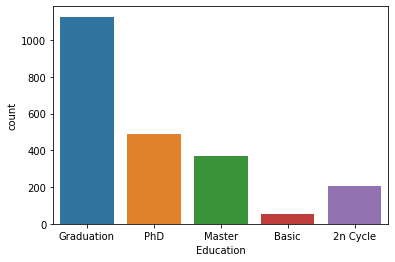

In [13]:
sns.countplot(x="Education",data=market_df)

Removing unwanted data involving Mmarital ststus

In [14]:
market_df=market_df[(market_df["Marital_Status"]!='Alone')&(market_df["Marital_Status"]!='Absurd')&(market_df["Marital_Status"]!='YOLO')]

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

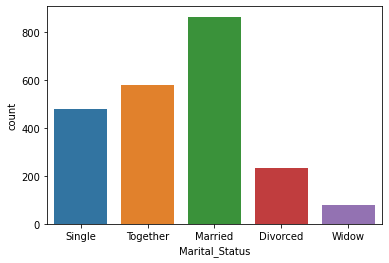

In [15]:
sns.countplot(x="Marital_Status",data=market_df)

Finding if the customer is old or new

In [16]:
market_df["Dt_Customer"] = pd.to_datetime(market_df["Dt_Customer"], dayfirst=True)

In [17]:
datelist = []
for i in market_df["Dt_Customer"]:
    datelist.append(i.date())

duration_list = []
for i in market_df["Dt_Customer"]:
    duration_list.append(max(datelist) - i.date())
    
market_df["dayscustomerfor"] = duration_list

In [18]:
market_df["dayscustomerfor"] = market_df["dayscustomerfor"].apply(lambda x: int(str(x).split(" ")[0]))
market_df["dayscustomerfor"].describe()

count    2233.000000
mean      353.557546
std       201.971642
min         0.000000
25%       181.000000
50%       355.000000
75%       528.000000
max       699.000000
Name: dayscustomerfor, dtype: float64

In [19]:
masknew = market_df["dayscustomerfor"] <= market_df["dayscustomerfor"].quantile(0.3)
maskold = market_df["dayscustomerfor"] > market_df["dayscustomerfor"].quantile(0.3)
market_df.loc[masknew, "Cust_Seniority"] = "New"
market_df.loc[maskold, "Cust_Seniority"] = "Old"
market_df["Cust_Seniority"].value_counts()

Old    1562
New     671
Name: Cust_Seniority, dtype: int64

Finding Age of the customer

In [20]:
market_df["Age"] = 2014 - market_df["Year_Birth"]

Make a new column to get total number of Children

In [21]:
market_df["Children"] = market_df["Kidhome"] + market_df["Teenhome"]

Finding frequent customers

In [22]:
market_df["Recency"].describe()

count    2233.000000
mean       49.172414
std        28.962114
min         0.000000
25%        24.000000
50%        50.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [23]:
frequent = market_df["Recency"] <= market_df["Recency"].quantile(0.6)
notFrequent = market_df["Recency"] > market_df["Recency"].quantile(0.6)
market_df.loc[frequent, "Frequency"] = "Frequent"
market_df.loc[notFrequent, "Frequency"] = "Not-Frequent"
market_df["Frequency"].value_counts()


Frequent        1349
Not-Frequent     884
Name: Frequency, dtype: int64

In [24]:
market_df.drop(["Kidhome","Teenhome","dayscustomerfor","Year_Birth","Dt_Customer","Recency"], axis=1, inplace=True)

Find Total Purchases made by the customer

In [25]:
market_df["Total_Purchase"]=market_df["NumWebPurchases"]+market_df["NumStorePurchases"]+market_df["NumCatalogPurchases"]

Distribution of the variables using histogram

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>],
       [<AxesSubplot:title={'center':'Total_campaigns_accepted'}>,
        <AxesSubplot:title={'center':'Total_spend'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Children'}>],
       [<AxesSubplot:title={'center':'Total_Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>,

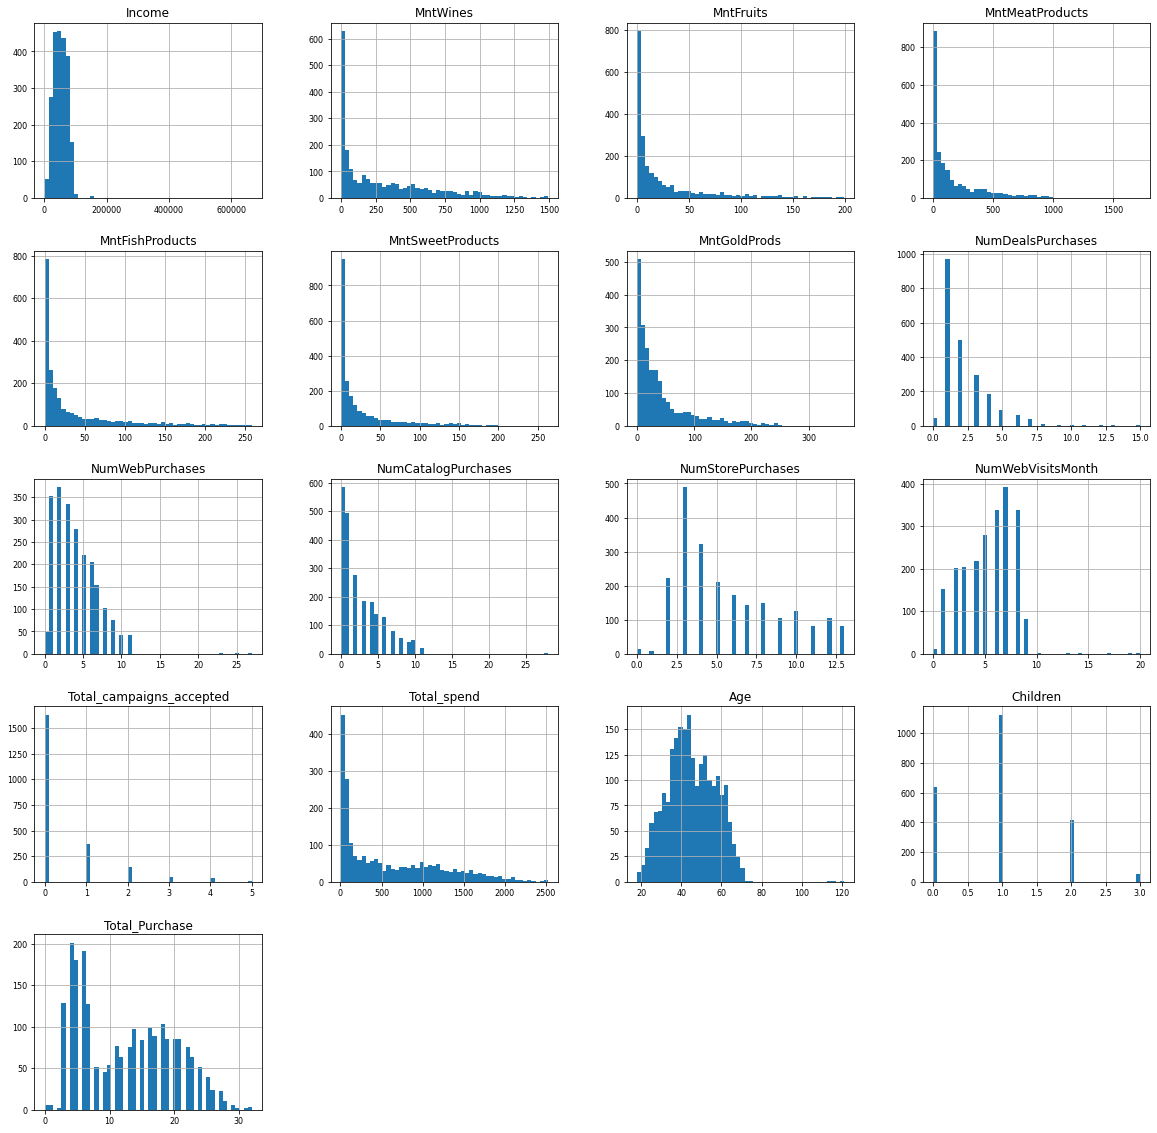

In [26]:
market_df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

Distribution of the variables using box charts

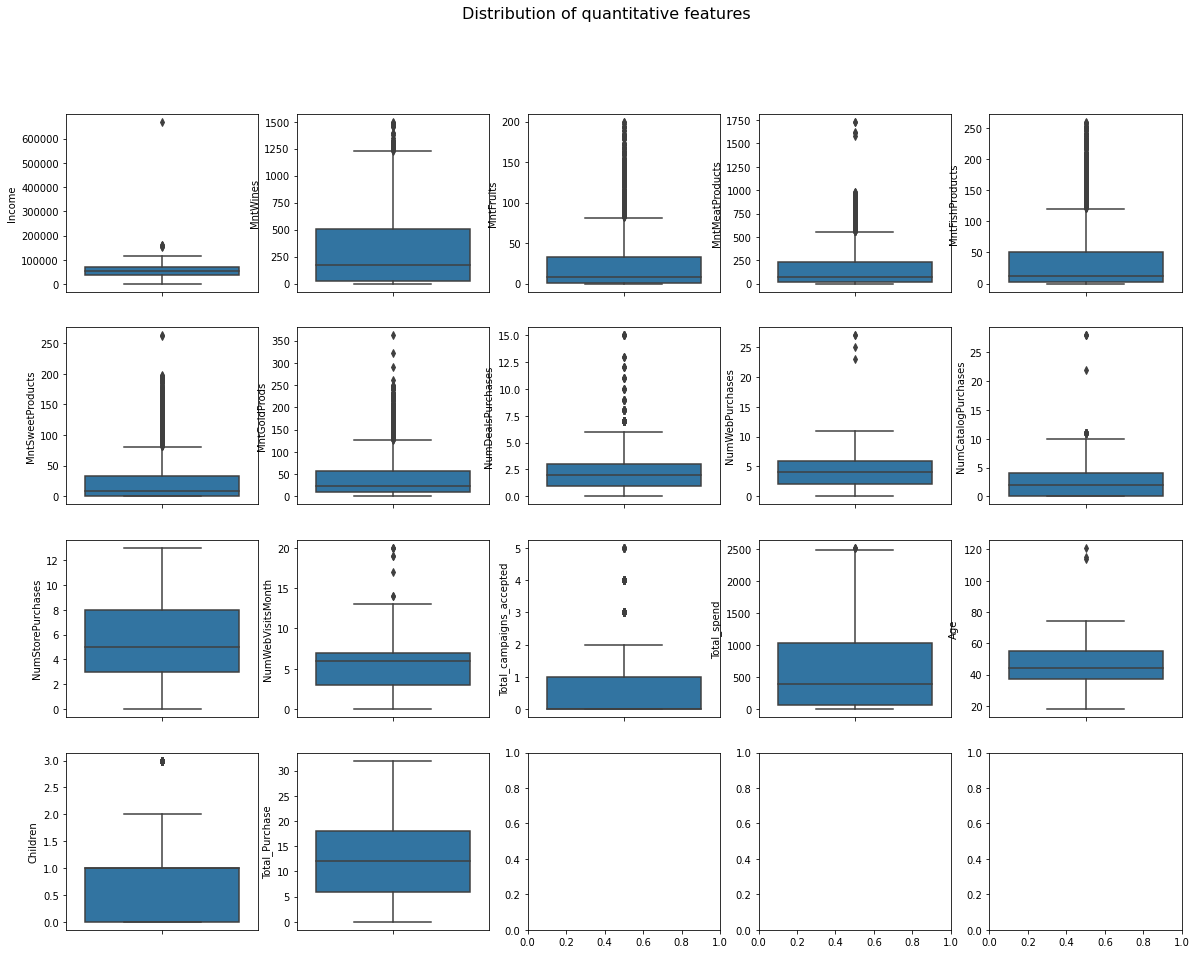

In [27]:
fig, axes = plt.subplots(4, 5, figsize=(20,15))
fig.suptitle('Distribution of quantitative features', fontsize=16)
# plt.tight_layout()
plot_data=market_df.select_dtypes(exclude="object")
for ax,col in zip(axes.flatten(),plot_data.columns):
    if plot_data[col].dtype!='object':
        sns.boxplot(data = plot_data, y = col, ax=ax)
plt.show()

Removing outliners that lie more than 3 Zscore 

In [28]:
#Removing Outliners
from scipy import stats

for col in market_df.columns:
    if market_df[col].dtype!='object':
        market_df=market_df[np.abs(stats.zscore(market_df[col])) < 3]

In [29]:
data_market=market_df.copy()

Encoding Categorical Data and Scaling them

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



label=LabelEncoder()
market_df["Education"]=label.fit_transform(market_df["Education"])
market_df["Marital_Status"]=label.fit_transform(market_df["Marital_Status"])
market_df["Frequency"]=label.fit_transform(market_df["Frequency"])
market_df["Cust_Seniority"]=label.fit_transform(market_df["Cust_Seniority"])

dataencoded=market_df.copy()

scale=StandardScaler()
data_s=scale.fit_transform(market_df)

market_df=pd.DataFrame(data_s,columns=market_df.columns)
market_df.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_campaigns_accepted,Total_spend,Cust_Seniority,Age,Children,Frequency,Total_Purchase
0,-0.354372,0.250337,-0.017143,-0.774364,-0.594028,-0.680255,-0.596998,-0.604545,-0.706928,-0.221647,...,-0.412677,-1.073949,-0.326513,-0.465565,-0.864245,-1.496832,1.323665,1.290112,-0.813841,-1.040840
1,-0.354372,1.192781,1.380534,0.708057,1.179766,0.175037,2.409354,0.169826,0.255819,-0.856136,...,0.055668,1.504104,-0.804544,-0.465565,0.783775,0.668078,0.358793,-1.510470,-0.813841,1.358113
2,-0.354372,1.192781,-1.106677,-0.774364,-0.483166,-0.581296,-0.376348,-0.527108,-0.733671,-0.221647,...,-0.881023,-0.429436,0.151519,-0.465565,-0.807038,-1.496832,-1.307806,-0.110179,-0.813841,-0.740971
3,1.421950,-0.692107,0.643779,-0.195684,0.958042,0.111420,0.616575,0.402137,-0.466241,1.681823,...,0.524014,0.215077,-0.326513,-0.465565,0.004871,-1.496832,-1.044659,-0.110179,1.228741,0.458505
4,0.533789,1.192781,0.877195,1.043834,0.921088,-0.029951,-0.652160,0.982915,-0.492984,-0.221647,...,0.992359,1.504104,0.151519,-0.465565,0.651757,0.668078,0.183361,-0.110179,-0.813841,1.358113


Finding the correlation between variables using heatmap

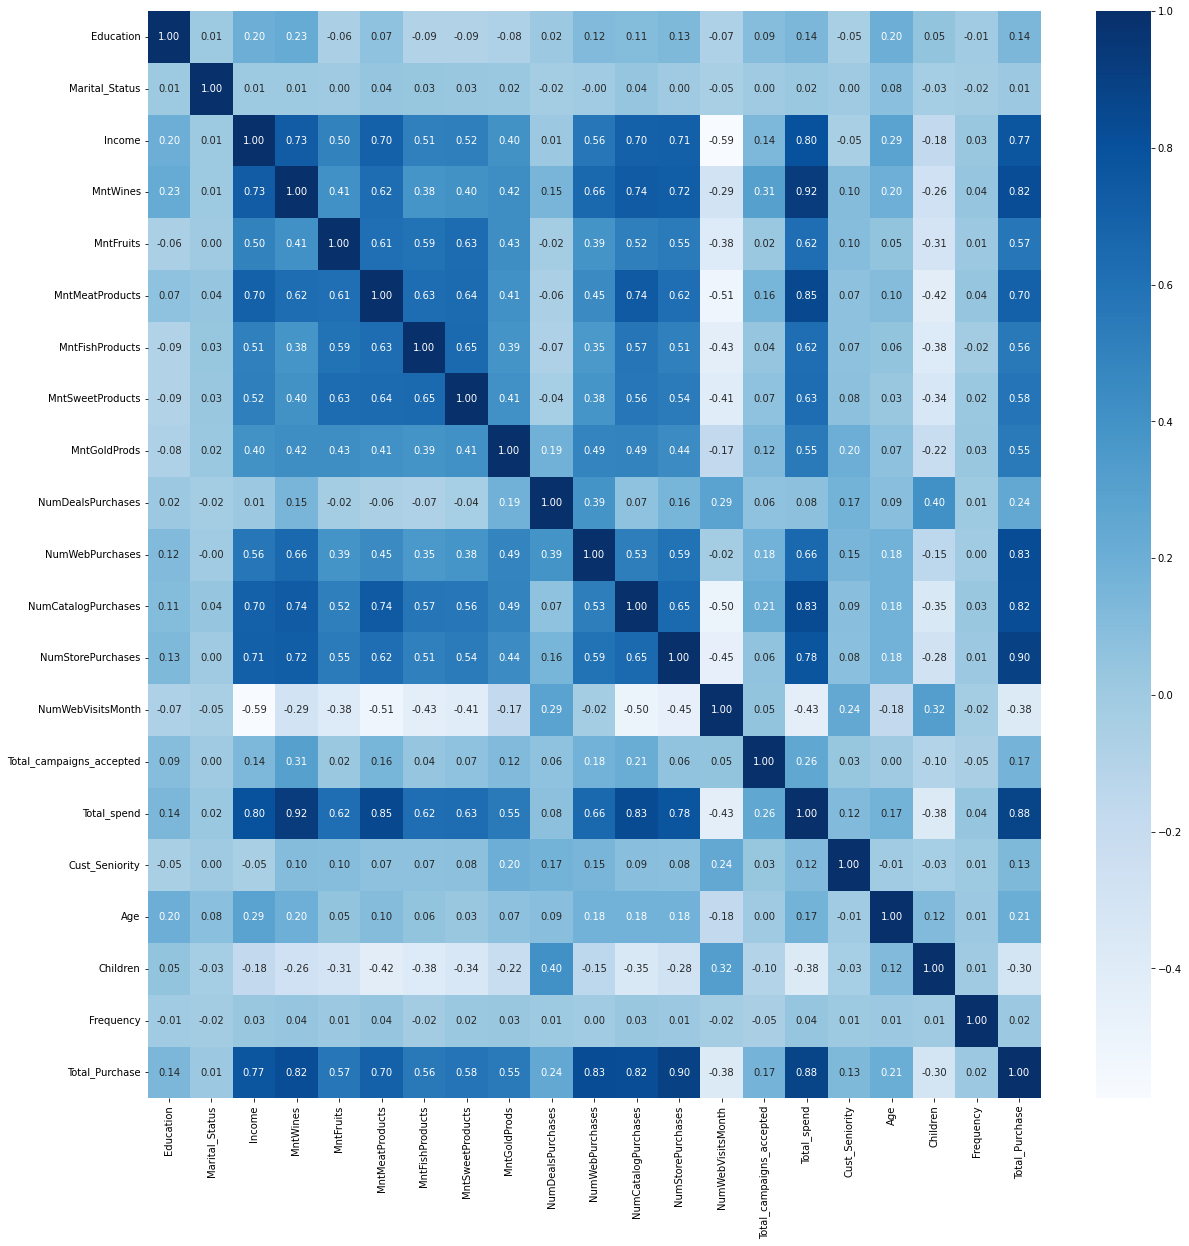

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(market_df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

Finding PCA and finding the important features to be used for clustering

In [41]:
from sklearn.decomposition import PCA

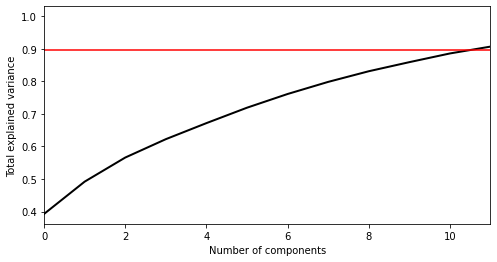

In [45]:
pca = PCA().fit(market_df)


plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.axhline(0.896, c='r')
plt.show()

We can see that we need 11 features to contain 90% of data. So we will find which feature are important

In [55]:
pca=PCA()
pca.fit_transform(market_df)
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(market_df.columns) + 1)],
    index=market_df.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Education,0.114454,0.247771,-0.631004,0.230306,-0.037377,-0.080473,-0.386142,-0.273920,-0.311690,0.352339,...,0.092798,0.007028,-0.013032,-0.004746,0.010847,-0.000418,0.004102,0.002077,8.321126e-32,-6.108086e-32
Marital_Status,0.032551,-0.047323,-0.094150,-0.054829,0.843349,-0.384474,0.250539,-0.241966,-0.049657,-0.023077,...,-0.035164,-0.017362,-0.015125,0.012696,-0.001135,0.003276,-0.005535,-0.006025,2.134504e-33,1.813875e-32
Income,0.838526,0.006911,-0.304579,-0.089614,-0.058030,0.052540,0.038299,0.026379,-0.027877,-0.132138,...,-0.149454,0.079833,-0.110167,0.054258,-0.192400,0.089733,-0.117234,-0.245592,2.796882e-31,6.542833e-33
MntWines,0.827954,0.266652,-0.158599,0.217526,-0.068166,-0.064499,0.011117,-0.079246,0.099353,-0.176392,...,-0.132578,0.056983,0.058234,-0.011679,0.187355,0.017310,-0.214648,0.094168,-7.659411e-17,-1.320394e-16
MntFruits,0.695583,-0.217459,0.236316,-0.184203,0.011784,0.067289,-0.038368,0.043878,-0.233756,0.232183,...,-0.281510,-0.308109,0.232427,0.127720,-0.013568,-0.092260,-0.048167,-0.013961,-7.403835e-18,-1.276336e-17


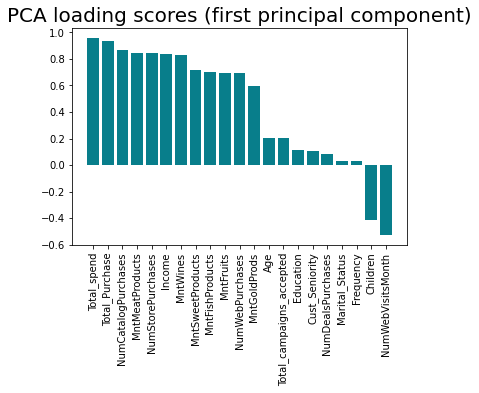

In [56]:
#finding correlation with PC! and getiing important feature
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

We now can see the features with most variance. But as they are highly correalted with each other we will be using the feature with granular level that makes sense

In [124]:
to_keep = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebVisitsMonth',
       'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']

# to_keep = ['Income', 'Total_spend','NumWebVisitsMonth','Total_Purchase']

Plotting clusters with max PCA values for clear visualization

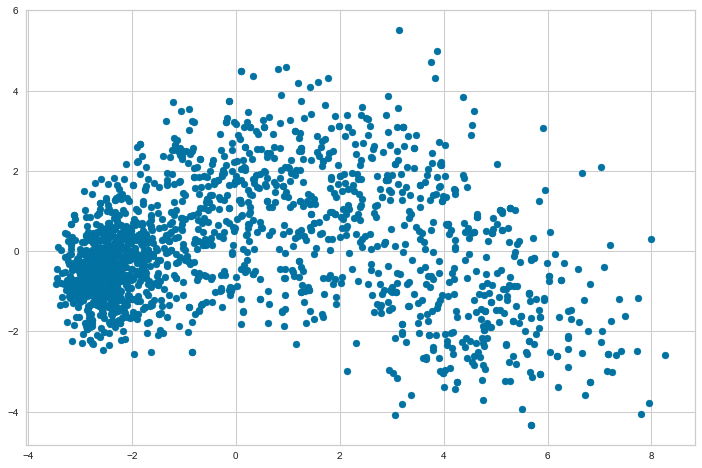

In [125]:
pca = PCA(0.95)
Xt = pca.fit_transform(market_df)

plt.figure(figsize=(12,8))
plot = plt.scatter(Xt[:,0], Xt[:,1])

Clustering using Kmeans

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

Using elbow method to find optimum number of clusters

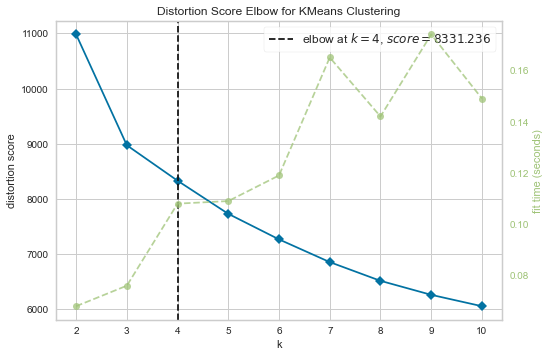

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(market_df[to_keep])
Elbow_M.show()

We can see that k=4 gives the best result for the Kmeans Algorithm.


In [110]:
#Kmeans
cluster=KMeans(n_clusters=4).fit(market_df[to_keep])

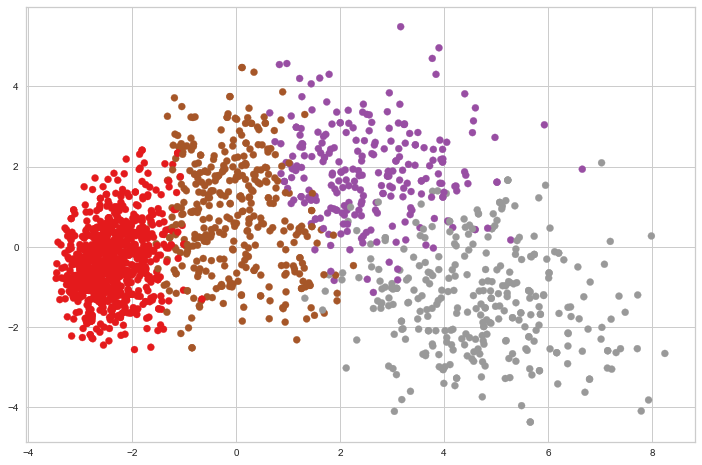

In [111]:
plt.figure(figsize=(12,8))
plot = plt.scatter(Xt[:,0], Xt[:,1],c=cluster.labels_,cmap="Set1")

Cluster validations using Silhoutte score and SSE calculations

In [112]:
score = silhouette_score(market_df, cluster.labels_, metric='euclidean')

print('Silhouetter Score:', score)

Silhouetter Score: 0.15187152268124662


In [113]:
print(cluster.inertia_)

8326.278414075443


In [114]:
kmarket_df=market_df[to_keep]
kmarket_df['cluster']=cluster.labels_
centers=cluster.cluster_centers_
df=pd.DataFrame()
seelist=[]

for i in range(4):
    df=kmarket_df.loc[kmarket_df['cluster']==i]
    df=df.drop('cluster',axis=1)
    edist=[]
    for index, row in df.iterrows():
        edist.append(np.linalg.norm(row - centers[i]))
    seelist.append(sum(map(lambda x:x*x,edist)))
    
sse=sum(seelist)
print(sse)

    
  

C:\Users\Vijay\AppData\Local\Temp\ipykernel_22744\2966582565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmarket_df['cluster']=cluster.labels_


8326.278414075434


Method the plot and analuze dataset

In [73]:
def cluster_analysis(data,clusterAl,clusteringtype):    
    fig, axes = plt.subplots(6, 4, figsize=(20,30))
    kdata=data
    kdata['cluster']=clusterAl.labels_
    pl1=sns.countplot(data=kdata, x="cluster", palette="tab20",ax=axes.flatten()[0])
    pl1.set_title("Cluster Distribution")

    pl2 = sns.scatterplot(data = kdata,x=kdata["Total_spend"], y=kdata["Income"],hue=kdata["cluster"], palette="tab20",ax=axes.flatten()[1])
    pl2.set_title("Income And Spending w/ Cluster")
    pl2.legend()

    kdata["Age_bins"] = pd.cut(kdata["Age"], bins=[20,35,50,65,80])
    pl3=sns.countplot(x=kdata["cluster"], hue=kdata["Age_bins"], palette="tab20",ax=axes.flatten()[2])
    pl3.set_title("Age Distribution")
    pl3.legend()

    pl4=sns.countplot(x=kdata["cluster"], hue=kdata["Children"], palette="tab20",ax=axes.flatten()[3])
    pl4.set_title("Children Distribution")
    pl4.legend()

    pl5=sns.countplot(x=kdata["cluster"], hue=kdata["Education"], palette="tab20",ax=axes.flatten()[4])
    pl5.set_title("Education Distribution")
    pl5.legend()

    pl6=sns.countplot(x=kdata["cluster"], hue=kdata["Frequency"], palette="tab20",ax=axes.flatten()[5])
    pl6.set_title("Recency Distribution")
    pl6.legend()

    pl7=sns.countplot(x=kdata["cluster"], hue=kdata["Cust_Seniority"], palette="tab20",ax=axes.flatten()[6])
    pl7.set_title("Seniority Distribution")
    pl7.legend()

    pl8=sns.countplot(x=kdata["cluster"], hue=kdata["Marital_Status"], palette="tab20",ax=axes.flatten()[7])
    pl8.set_title("Relationship Distribution")
    pl8.legend()

    pl9=sns.boxplot(x=kdata["cluster"], y=kdata["NumCatalogPurchases"], palette="tab20",ax=axes.flatten()[8])
    pl9.set_title("Catalog Purchases")

    pl10=sns.boxplot(x=kdata["cluster"], y=kdata["NumStorePurchases"], palette="tab20",ax=axes.flatten()[9])
    pl10.set_title("Store Purchases")

    pl11=sns.boxplot(x=kdata["cluster"], y=kdata["NumWebPurchases"], palette="tab20",ax=axes.flatten()[10])
    pl11.set_title("Web Purchases")

    pl12=sns.boxplot(x=kdata["cluster"], y=kdata["NumDealsPurchases"], palette="tab20",ax=axes.flatten()[11])
    pl12.set_title("Purchases On Deal")

    pl13=sns.boxplot(x=kdata["cluster"], y=kdata["Income"], palette="tab20",ax=axes.flatten()[12])
    pl13.set_title("Income Distribution")

    pl14=sns.boxplot(x=kdata["cluster"], y=kdata["Total_campaigns_accepted"], palette="tab20",ax=axes.flatten()[13])
    pl14.set_title("Campaigns Distribution")

    pl15=sns.boxplot(x=kdata["cluster"], y=kdata["Total_spend"], palette="tab20",ax=axes.flatten()[14])
    pl15.set_title("Spending Distribution")

    pl16=sns.boxplot(x=kdata["cluster"], y=kdata["Total_Purchase"], palette="tab20",ax=axes.flatten()[15])
    pl16.set_title("Purchase Distribution")

    pl17=sns.boxplot(x=kdata["cluster"], y=kdata["MntFruits"], palette="tab20",ax=axes.flatten()[16])
    pl17.set_title("Fruit Spending Distribution")

    pl18=sns.boxplot(x=kdata["cluster"], y=kdata["MntFishProducts"], palette="tab20",ax=axes.flatten()[17])
    pl18.set_title("Fish Spending Distribution")


    pl19=sns.boxplot(x=kdata["cluster"], y=kdata["MntGoldProds"], palette="tab20",ax=axes.flatten()[18])
    pl19.set_title("Gold Spending Distribution")


    pl20=sns.boxplot(x=kdata["cluster"], y=kdata["MntMeatProducts"], palette="tab20",ax=axes.flatten()[19])
    pl20.set_title("Meat Spending Distribution")


    pl21=sns.boxplot(x=kdata["cluster"], y=kdata["MntSweetProducts"], palette="tab20",ax=axes.flatten()[20])
    pl21.set_title("Sweat Spending Distribution")


    pl22=sns.boxplot(x=kdata["cluster"], y=kdata["MntWines"], palette="tab20",ax=axes.flatten()[21])
    pl22.set_title("Wine Spending Distribution")

    pl23=sns.boxplot(x=kdata["cluster"], y=kdata["NumWebVisitsMonth"], palette="tab20",ax=axes.flatten()[22])
    pl23.set_title("Website Vist Distribution")

    pl24 = sns.scatterplot(data = kdata,x=kdata["Total_Purchase"], y=kdata["Income"],hue=kdata["cluster"], palette="tab20",ax=axes.flatten()[23])
    pl24.set_title("Income And Purchase w/ Cluster")
    pl24.legend()

    plt.show()
    fig.savefig("Cluster Analysis-"+clusteringtype+".png")

Analuzing the data with the clusters formed

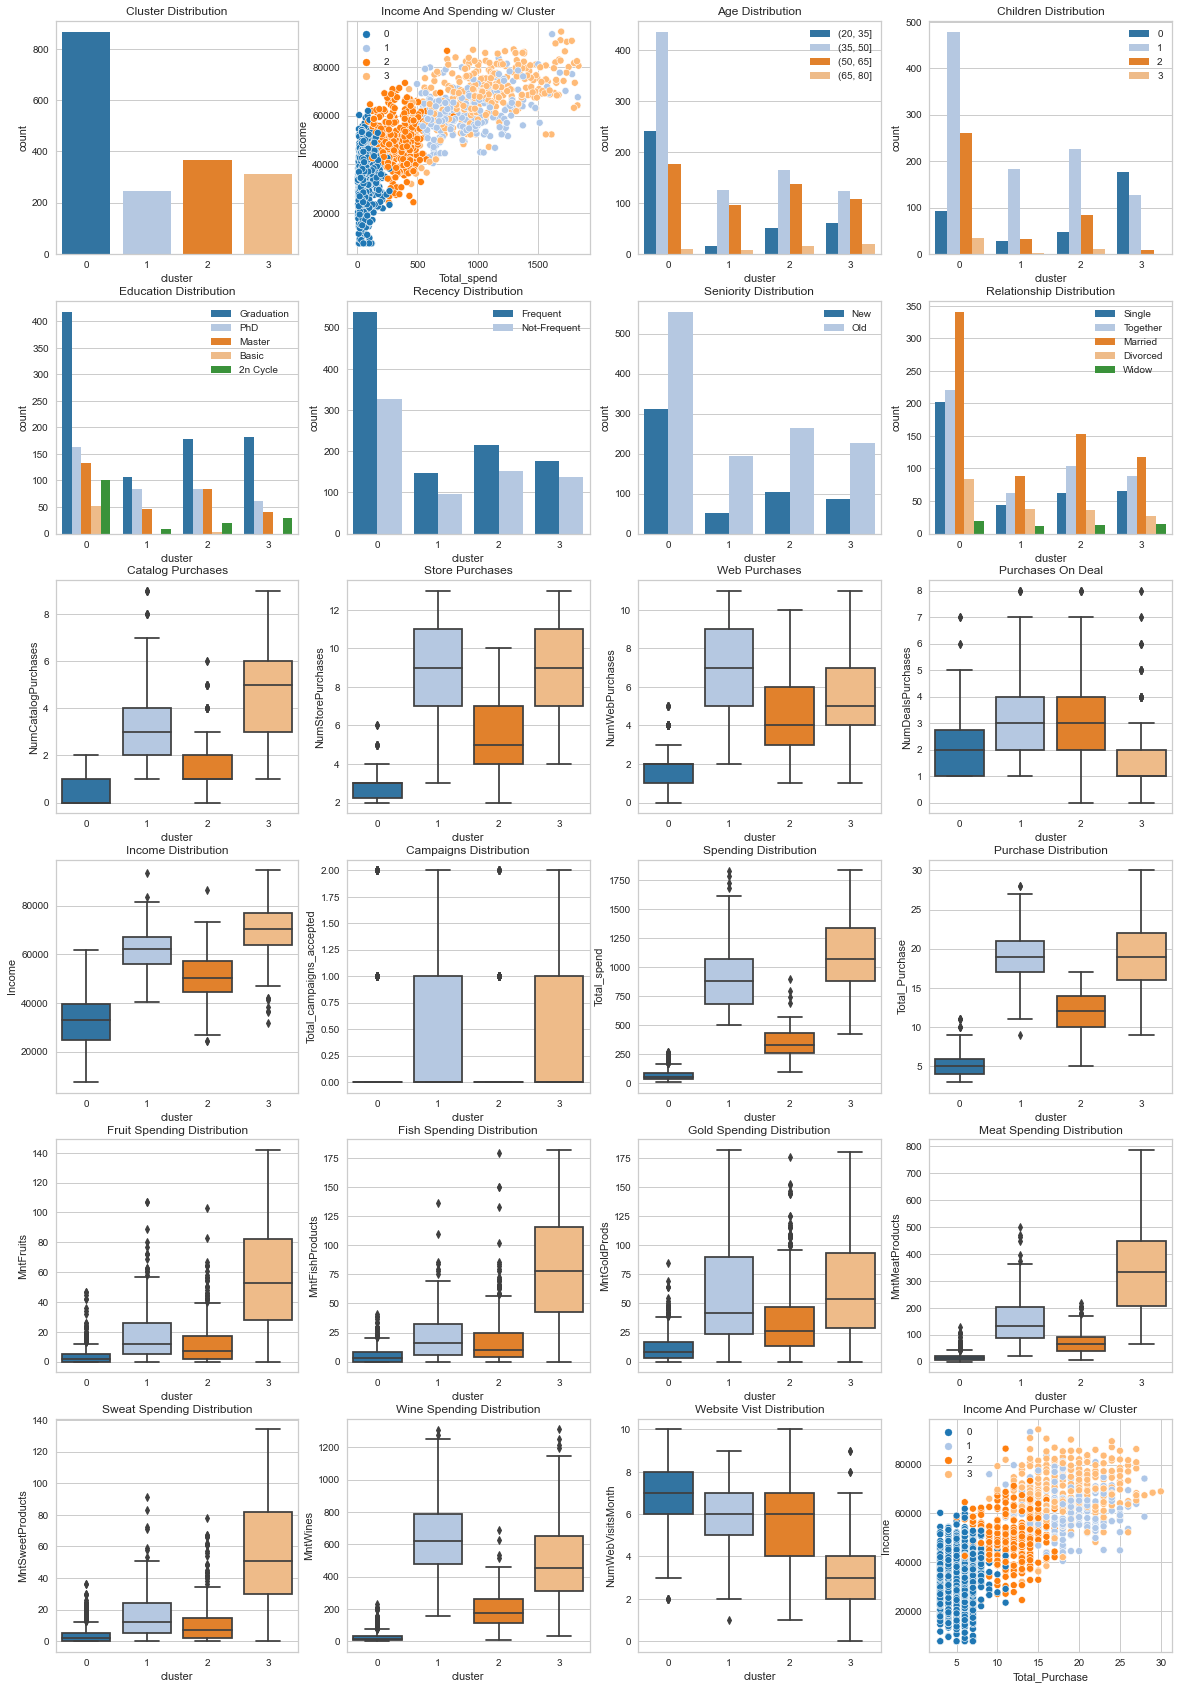

In [115]:
cluster_analysis(data_market,cluster,"Kmeans")

Heirarchial Clustering

In [75]:
import scipy.cluster.hierarchy as shc

Using dendogram we can find the optimum number of clusters needed

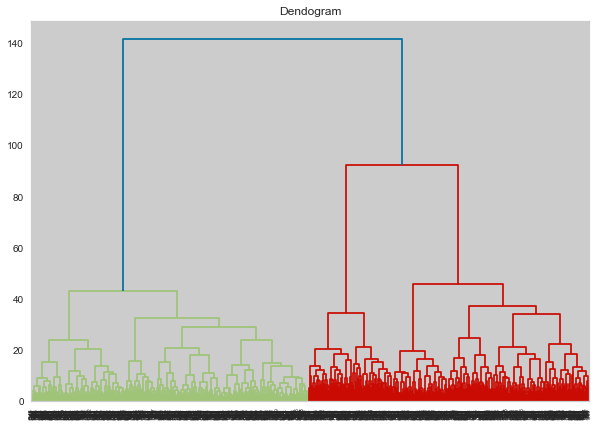

In [99]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(market_df, method='ward'))

We can clearly interpret that 3 clusters give a good understanding of the data and are seperated well in the dendogram

In [116]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster.fit(market_df)

AgglomerativeClustering(n_clusters=3)

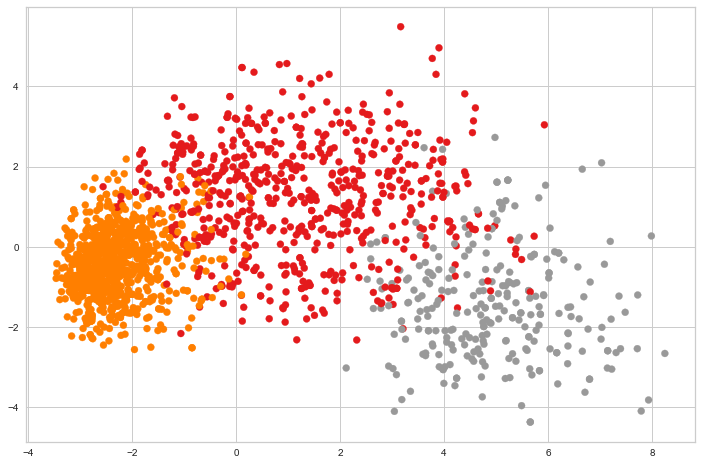

In [117]:
plt.figure(figsize=(12,8))
plot = plt.scatter(Xt[:,0], Xt[:,1],c=hcluster.labels_,cmap="Set1")

Validating the clusters using Silhouette Coefficient and SSE

In [118]:
hscore = silhouette_score(market_df, hcluster.labels_, metric='euclidean')

print('Silhouetter Score:', hscore)

Silhouetter Score: 0.2147778257778356


In [119]:
hmarket_df=market_df
hmarket_df['cluster']=hcluster.labels_
hdf=pd.DataFrame()
seelist=[]
hcluster_centers=[[0]*21]*3
for i in range(3):
    hdf=hmarket_df.loc[hmarket_df['cluster']==i]
    hdf=hdf.drop('cluster',axis=1)
    mat=pd.DataFrame(hdf.mean()).to_numpy()
    hcluster_centers.append(mat.transpose())

for i in range(3):
    hdf=hmarket_df.loc[hmarket_df['cluster']==i]
    hdf=hdf.drop('cluster',axis=1)
    edist=[]
    for index, row in hdf.iterrows():
        edist.append(np.linalg.norm(row - hcluster_centers[i]))
    seelist.append(sum(map(lambda x:x*x,edist)))
    
sse=sum(seelist)
print(sse)

37631.99999999999


Analyzing the cluster wih the dataset

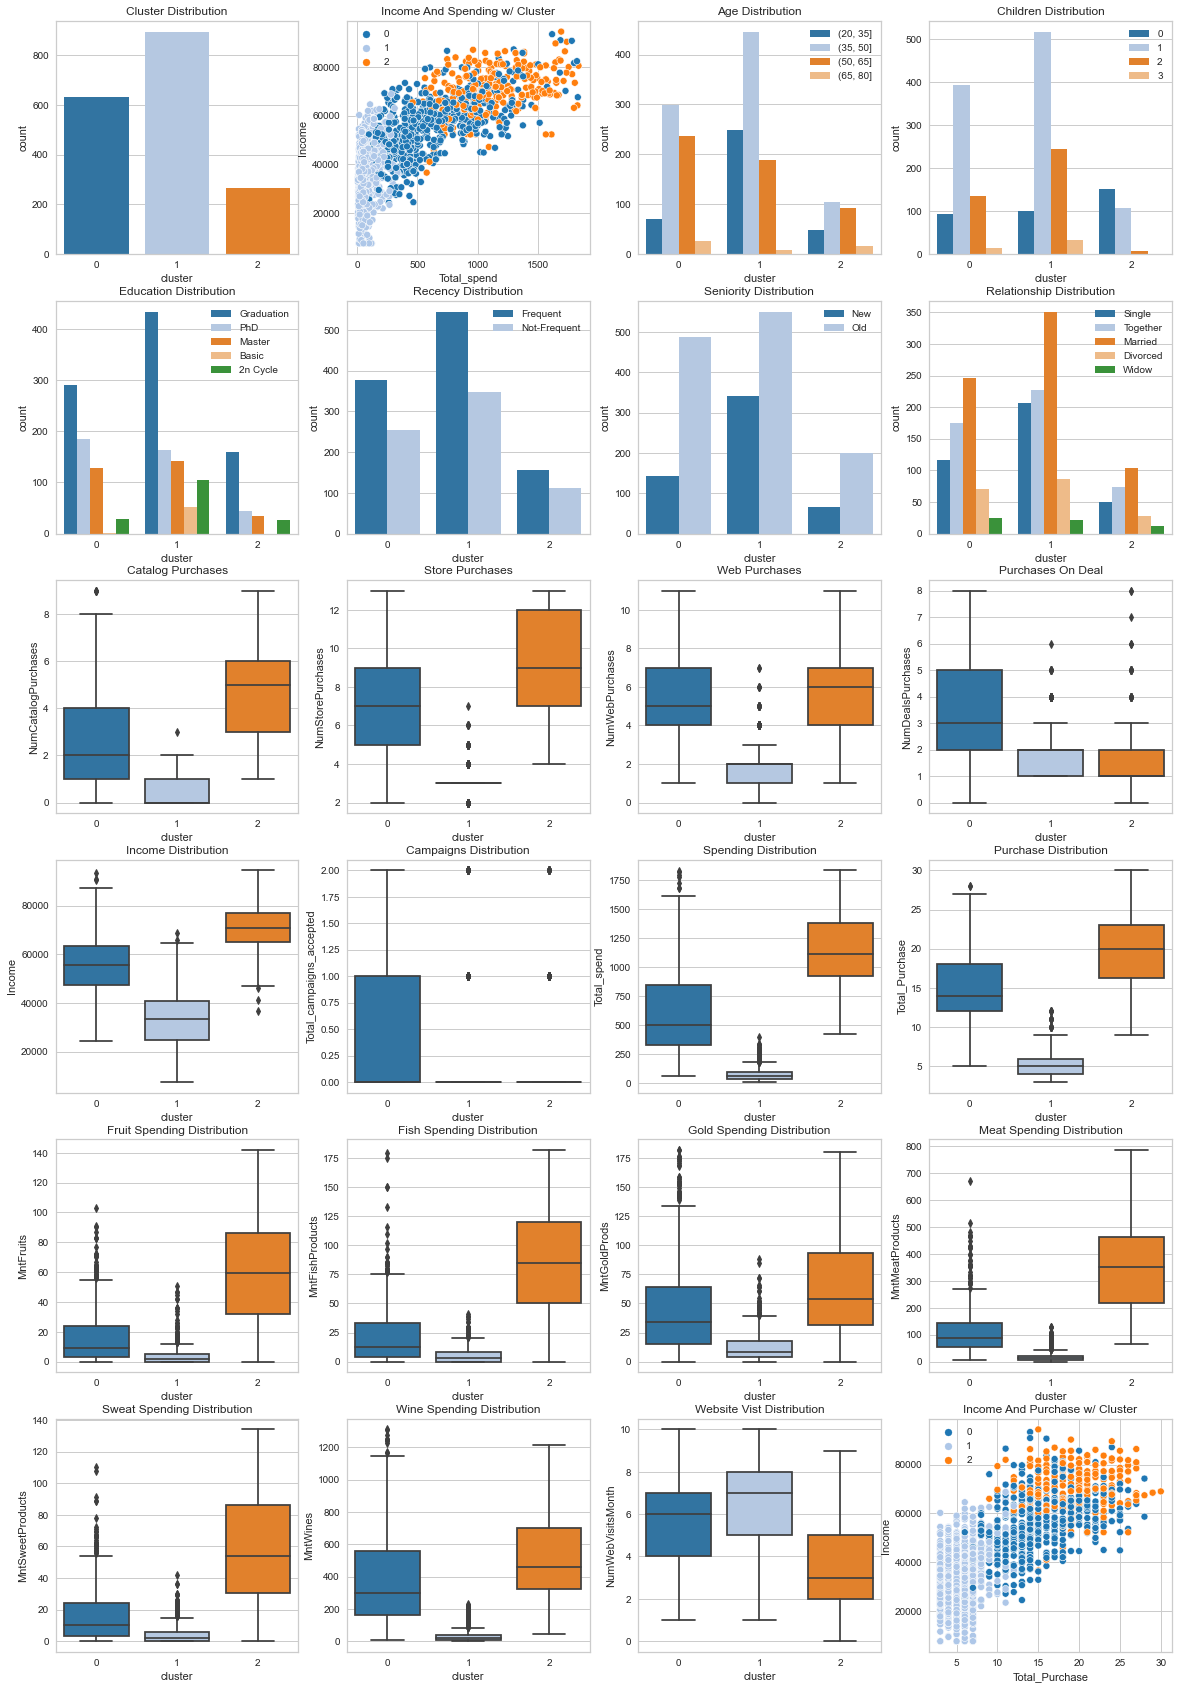

In [120]:
cluster_analysis(data_market,hcluster,"Heirarchial")